# data 가져오기

In [31]:
import pandas as pd
import numpy as np

In [32]:
datapath = "./data/winequalityN.csv"

data_sets = pd.read_csv(datapath, delimiter = ',')

data_sets.dropna(inplace = True)

x_data = data_sets.drop(columns = ["type", "quality"],axis = 1)
y_data = data_sets["quality"]

x_data = x_data.dropna(axis = 0)
y_data = y_data.dropna(axis = 0)

In [33]:
y_data = np.where(data_sets['quality'] > 5,1.0,0.0)
x_data = x_data.values.tolist()

In [34]:
x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(6463, 11)
(6463,)


# SVM

In [35]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 차원축소

In [51]:
def get_PCA(x_data):
    pca = PCA(n_components = 6).fit_transform(x_data)
    
    return pca

def get_t_sne(x_data):
    t_sne = TSNE(n_components = 3).fit_transform(x_data)
    
    return t_sne

def get_LLE(x_data):
    lle = LocallyLinearEmbedding(n_components = 6).fit_transform(x_data)
        
    return lle

def get_MDS(x_data):
    mds = MDS(n_components = 6).fit_transform(x_data)
    
    return mds

def get_Isomap(x_data):
    isomap = Isomap(n_components = 6).fit_transform(x_data)
    
    return isomap

def get_LDA(x_data, y_data):
    lda = LinearDiscriminantAnalysis(n_components = 3).fit_transform(x_data, y_data)
    
    return lda

In [ ]:
x_data_pca = get_PCA(x_data)
print("PCA : {} -> {}".format(x_data.shape,x_data_pca.shape))

In [ ]:
x_data_lle = get_LLE(x_data)
print("LLE : {} -> {}".format(x_data.shape,x_data_lle.shape))

In [52]:
x_data_lda = get_LDA(x_data, y_data)
print("Isomap : {} -> {}".format(x_data.shape,x_data_lda.shape))

Isomap : (6463, 11) -> (6463, 1)


In [ ]:
x_data_isomap = get_Isomap(x_data)
print("Isomap : {} -> {}".format(x_data.shape,x_data_isomap.shape))

In [ ]:
x_data_t_sne = get_t_sne(x_data)
print("t_sne : {} -> {}".format(x_data.shape,x_data_t_sne.shape))

In [ ]:
x_data_mds = get_MDS(x_data)
print("MDS : {} -> {}".format(x_data.shape,x_data_mds.shape))

# 데이터 분포 그려보기

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_graph(x_data, y_data):
    x_data_set = pd.DataFrame(x_data)
    y_data_set = pd.DataFrame(y_data, columns = ['quailty'])
    data_set = pd.merge(x_data_set, y_data_set,left_index = True, right_index = True)
    see_maxtrix_use_pyplot(data_set)

def see_maxtrix_use_pyplot(data_set):
    sns.pairplot(data_set, kind="scatter", hue = 'quailty')
    plt.show()

In [ ]:
show_graph(x_data_pca, y_data)

In [ ]:
show_graph(x_data_lle, y_data)

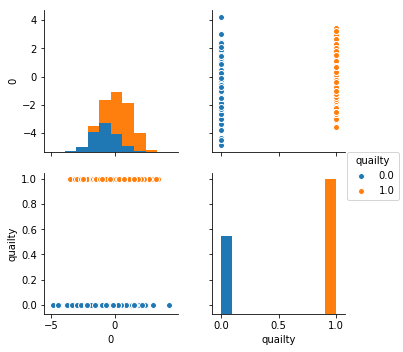

In [42]:
show_graph(x_data_lda, y_data)

In [ ]:
show_graph(x_data_isomap, y_data)

In [ ]:
show_graph(x_data_t_sne, y_data)

In [ ]:
show_graph(x_data_mds, y_data)

# 모델 선택 (교차 검증)

In [9]:
def model_selection(x_data, y_data):
    kernels = ['linear','poly','rbf'] # 'sigmoid' takes a long time
    svm_model = []
    scores = []
    
    for i in kernels:
        temp_model = make_pipeline(StandardScaler(), svm.SVR(C = 1.0, epsilon = 0.1, kernel = i))
        scores.append(cross_val_score(temp_model, x_data, y_data, cv = 5).mean())
    
    for i,j in enumerate(scores):
        print("model : {}, score : {}".format(kernels[i], j))
    
    k = np.argmax(np.array(scores))
    
    return kernels[k]

In [ ]:
kernel = model_selection(x_data_pca,y_data) #pca
select_data_set = x_data_pca

In [ ]:
kernel = model_selection(x_data_lle,y_data) # lle
select_data_set = x_data_lle

In [53]:
kernel = model_selection(x_data_lda,y_data) # lda
select_data_set = x_data_lda

model : linear, score : 0.216758962638
model : poly, score : -0.165343182508
model : rbf, score : 0.156725172604


In [ ]:
kernel = model_selection(x_data_isomap,y_data) # Isomap
select_data_set = x_data_isomap

In [ ]:
kernel = model_selection(x_data_mds,y_data) # MDS
select_data_set = x_data_mds

In [ ]:
kernel = model_selection(x_data_t_sne,y_data) #t-sne
select_data_set = x_data_t_sne

# train, validation, test 나누기

In [54]:
x_train, x_test, y_train, y_test = train_test_split(select_data_set, y_data,test_size = 0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(4136, 1)
(4136,)
(1034, 1)
(1034,)
(1293, 1)
(1293,)


# train

In [93]:
def get_predictions(model, x_data):
    predictions = model.predict(x_data)
    predictions = np.around(predictions)
    
    return predictions

def model(x_train, y_train):
    svm_model = make_pipeline(StandardScaler(), svm.SVR(C = 100, epsilon = 0.3, kernel = kernel))

    svm_model.fit(x_train, y_train)
    
    predictions = get_predictions(svm_model, x_train)
            
    return svm_model, predictions

m1, p = model(x_train, y_train)

# 모델 평가

In [97]:
print("모델 평가 : {}".format(m1.score(x_train, y_train)))
print("Train set 정확도: {:.2f}".format(accuracy_score(y_train, p)))

모델 평가 : 0.253438040942
Train set 정확도: 0.74


# Validation 평가

In [94]:
score = m1.score(x_val, y_val)

print("SVM 의 교차검증 점수 : {}".format(score))

SVM 의 교차검증 점수 : 0.256965519701


# Validation train

In [ ]:
m1.fit(x_val, y_val)

# test로 정확도 측정

In [98]:
print("Test set 정확도: {:.2f}".format(accuracy_score(y_test, get_predictions(m1, x_test))))

Test set 정확도: 0.74


# 참고자료

* 차원축소(비선형) : https://woosikyang.github.io/first-post.html
* PCA : https://medium.com/@john_analyst/pca-%EC%B0%A8%EC%9B%90-%EC%B6%95%EC%86%8C-%EB%9E%80-3339aed5afa1
* LLE, ect : https://excelsior-cjh.tistory.com/168
* LDA : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-18-%EC%84%A0%ED%98%95%ED%8C%90%EB%B3%84%EB%B6%84%EC%84%9DLDA